In [63]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [74]:
mars = np.genfromtxt('harp_mars.dat', usecols=np.arange(0, 9))
jupiter = np.genfromtxt('harp_jupiter.dat', usecols=np.arange(0, 8))
uranus = np.genfromtxt('harp_uranus.dat', usecols=np.arange(0, 8))

In [102]:
mars = mars[mars[:,1] > 5]
mars = mars[mars[:,1] < 19]
jupiter = jupiter[jupiter[:,1] > 5]
jupiter = jupiter[jupiter[:,1] < 19]
uranus = uranus[uranus[:,1] > 5]
uranus = uranus[uranus[:,1] < 19]

In [103]:
mars_etamb = mars[:,5]
jupiter_etamb = jupiter[:,5]
uranus_etamb = uranus[:,5]

mars_dates = mars[:,0]
mars_dt_dates = [datetime.datetime.strptime(str(int(date)),'%Y%m%d') for date in mars_dates]
jupiter_dates = jupiter[:,0]
jupiter_dt_dates = [datetime.datetime.strptime(str(int(date)),'%Y%m%d') for date in jupiter_dates]
uranus_dates = uranus[:,0]
uranus_dt_dates = [datetime.datetime.strptime(str(int(date)),'%Y%m%d') for date in uranus_dates]

In [110]:
planets_etamb = np.concatenate((mars_etamb, jupiter_etamb, uranus_etamb), axis=0)
dates = np.concatenate((mars_dates, jupiter_dates, uranus_dates), axis=0)
dt_dates = [datetime.datetime.strptime(str(int(date)),'%Y%m%d') for date in dates]

In [105]:
coeffs, cov = np.polyfit(dates, planets_etamb, 1, full=False, cov=True)

In [106]:
fit = np.poly1d(coeffs)

In [107]:
print(cov)

[[  2.86182736e-14  -5.75447983e-07]
 [ -5.75447983e-07   1.15709704e+01]]


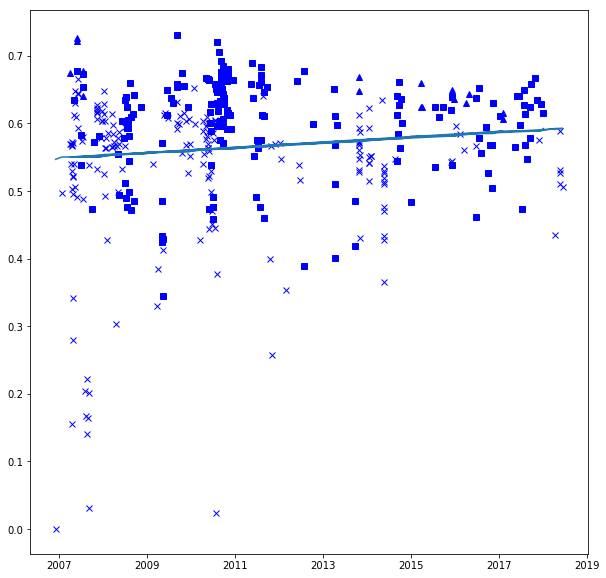

In [108]:
plt.figure(figsize=(10,10))
plt.plot(mars_dt_dates, mars_etamb, 'bx')
plt.plot(jupiter_dt_dates, jupiter_etamb, 'b^')
plt.plot(uranus_dt_dates, uranus_etamb, 'bs')
plt.plot(dt_dates, fit(dates))
plt.show()